In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Rhayven\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\Rhayven\Downloads\FB Chiz Escudero_sentiment_improved.csv")

Confusion Matrix:
[[214  83  43]
 [ 48 287  70]
 [ 52  70 470]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.68      0.63      0.65       340
     Neutral       0.65      0.71      0.68       405
    Positive       0.81      0.79      0.80       592

    accuracy                           0.73      1337
   macro avg       0.71      0.71      0.71      1337
weighted avg       0.73      0.73      0.73      1337

Overall Accuracy: 0.73


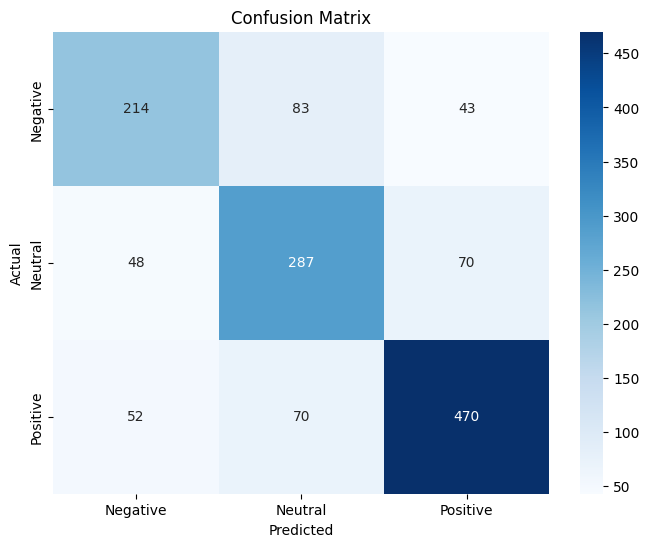

In [3]:
X = df['comment']
y = df['final_sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf_classifier, X_tfidf, y, cv=skf)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y, y_pred))

accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [5]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold = 1
fold_accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.2f}")
    fold += 1

print(f"\nAverage Accuracy across 10 folds: {np.mean(fold_accuracies):.2f}")

Fold 1 Accuracy: 0.83
Fold 2 Accuracy: 0.71
Fold 3 Accuracy: 0.77
Fold 4 Accuracy: 0.63
Fold 5 Accuracy: 0.75
Fold 6 Accuracy: 0.69
Fold 7 Accuracy: 0.75
Fold 8 Accuracy: 0.69
Fold 9 Accuracy: 0.71
Fold 10 Accuracy: 0.73

Average Accuracy across 10 folds: 0.73
